# Ok Cupid Date a scientist

## Exploring the data

In [ ]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('profiles.csv', encoding='utf-8')
data.head(10)
len(data.index)

59946

In [3]:
data.columns.tolist()

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

* **age**: Numerical discrete 
* **body_type**: Categorical
* **diet**: Categorical
* **drinks**: Categorical
* **drugs**: Categorical
* **education**: Categorical
* **essay0**: TEXT
* **essay1**: TEXT
* **essay2**: TEXT
* **essay3**: TEXT
* **essay4**: TEXT
* **essay5**: TEXT
* **essay6**: TEXT
* **essay7**: TEXT
* **essay8**: TEXT
* **essay9**: TEXT
* **ethnicity**: Categorical
* **height**: numerical continuous
* **income**: numerical continuous
* **job**: Categorical
* **last_online**: DATE
* **location**: Categorical
* **offspring**: Categorical
* **orientation**: Categorical
* **pets**: Categorical
* **religion**: Categorical
* **sex**: Categorical
* **sign**: Categorical
* **smokes**: Categorical
* **speaks**: Categorical
* **status**: Categorical

I will make a model to predict income from other data using k-neighbors.

There are a lot of categorical data so it's necesary to map them to numerical discrete data to use the algorithms of machine learning. Before that I continue to explore the data and clean it up.

## Checking null values


I explore the data to se the range an check if there are non defined values.

In [4]:
data.isnull().sum()  

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

Many columns have null values and others not so is necesary to clean it up. First, I will separate the variables that I supose to be good indicators to predict income.

In [5]:
cols = ['age', 'drinks', 'drugs', 'education',
        'income','job','orientation', 'religion', 'sex', 'smokes', 'status']

Now, I drop the rows that have null values and check if the new dataframe has null values.

In [6]:
df = data[cols].dropna()
print(df.shape)

(26617, 11)


I print the unique values of each column to see if they need to be simplified.

In [7]:
for column in cols:
    print(column)
    print(df[column].unique())

age
[22 35 31 37 28 30 29 33 27 32 38 26 25 34 21 39 41 42 45 23 36 55 24 50
 59 54 20 62 44 52 43 58 66 53 19 46 40 47 49 51 48 63 61 57 60 18 56 64
 68 65 69 67]
drinks
['socially' 'often' 'not at all' 'rarely' 'very often' 'desperately']
drugs
['never' 'sometimes' 'often']
education
['working on college/university' 'working on space camp'
 'graduated from college/university' 'working on two-year college'
 'graduated from high school' 'graduated from space camp'
 'graduated from masters program' 'graduated from ph.d program'
 'working on masters program' 'graduated from law school'
 'dropped out of college/university' 'graduated from two-year college'
 'dropped out of space camp' 'working on ph.d program'
 'college/university' 'dropped out of high school' 'two-year college'
 'working on high school' 'dropped out of ph.d program'
 'dropped out of two-year college' 'high school'
 'graduated from med school' 'working on med school' 'masters program'
 'space camp' 'working on law school'

There are column with very complicated values, let's to clean them up. The religion and education columns have many values that are essentially the same but expressed in different way.  

In [8]:
df['religion_cleaned'] = df.religion.str.split().str.get(0)
print(df.religion_cleaned.unique())

['agnosticism' 'christianity' 'atheism' 'catholicism' 'other' 'buddhism'
 'judaism' 'hinduism' 'islam']


In [9]:
education_messy = df.education.unique()
print(education_messy)
print(len(education_messy))

['working on college/university' 'working on space camp'
 'graduated from college/university' 'working on two-year college'
 'graduated from high school' 'graduated from space camp'
 'graduated from masters program' 'graduated from ph.d program'
 'working on masters program' 'graduated from law school'
 'dropped out of college/university' 'graduated from two-year college'
 'dropped out of space camp' 'working on ph.d program'
 'college/university' 'dropped out of high school' 'two-year college'
 'working on high school' 'dropped out of ph.d program'
 'dropped out of two-year college' 'high school'
 'graduated from med school' 'working on med school' 'masters program'
 'space camp' 'working on law school' 'dropped out of masters program'
 'law school' 'dropped out of med school' 'dropped out of law school'
 'ph.d program' 'med school']
32


I define new categories gathering the similar values.

In [10]:
education_clean = {
'working_spacecamp':['working on space camp'],    
'space_camp':['graduated from space camp',
              'space camp'],
'dropped_space_camp':['dropped out of space camp'],
'working_college_university':['working on college/university',
                               'working on two-year college',
                               'working on med school',
                               'working on law school'],   
'college_university':['graduated from college/university',                      
                      'two-year college',
                      'graduated from law school',
                      'college/university',
                      'graduated from two-year college',                      
                      'graduated from med school',
                      'law school',
                      'med school'],
'dropped_college_university': ['dropped out of college/university',
                               'dropped out of two-year college',
                               'dropped out of law school',
                               'dropped out of med school'],
'high_school':['graduated from high school',
               'high school',
               'working on high school'],
'dropped_high_scholl':['dropped out of high school'],                  
'master_program':['working on masters program',
                  'masters program',
                  'graduated from masters program'],
'dropped_master_program':['dropped out of masters program'],
'phd_program':['working on ph.d program',
               'graduated from ph.d program',
               'ph.d program'],
'dropped_phd_program':['dropped out of ph.d program']
                  }

In [11]:
education_new = []
for education in df.education:
    for key in education_clean.keys():
        if education in education_clean[key]:
            education_new.append( key )

df['education_clean'] = education_new


In the income column there is a row with negative income, that is odd so I drop it down.

In [12]:
df = df[df.income>0]
print(df.income.unique())

[  80000   40000   30000   50000   20000  150000  100000 1000000   60000
   70000  250000  500000]


In [13]:
df.head(10)

,age,drinks,drugs,education,income,job,orientation,religion,sex,smokes,status,religion_cleaned,education_clean
1,35,often,sometimes,working on space camp,80000,hospitality / travel,straight,agnosticism but not too serious about it,m,no,single,agnosticism,working_spacecamp
11,28,socially,never,graduated from college/university,40000,banking / financial / real estate,straight,christianity and very serious about it,m,no,seeing someone,christianity,college_university
13,30,socially,never,graduated from high school,30000,sales / marketing / biz dev,straight,christianity but not too serious about it,f,no,single,christianity,high_school
14,29,socially,never,working on college/university,50000,other,straight,catholicism,f,no,single,catholicism,working_college_university
66,22,rarely,never,working on college/university,20000,education / academia,straight,buddhism and laughing about it,m,no,single,buddhism,working_college_university
72,35,socially,sometimes,graduated from space camp,150000,artistic / musical / writer,straight,agnosticism and very serious about it,m,no,single,agnosticism,space_camp
73,31,socially,never,graduated from law school,50000,law / legal services,straight,hinduism but not too serious about it,f,no,single,hinduism,college_university
79,21,rarely,never,working on college/university,20000,entertainment / media,straight,catholicism but not too serious about it,m,no,single,catholicism,working_college_university
82,34,socially,never,graduated from masters program,100000,executive / management,straight,agnosticism,m,no,single,agnosticism,master_program
94,29,socially,sometimes,graduated from college/university,40000,artistic / musical / writer,straight,agnosticism and very serious about it,m,no,single,agnosticism,college_university


I leave just the cleaned columns

In [14]:
df.drop(['religion'], inplace=True, axis = 1)
df.drop(['education'], inplace=True, axis = 1)
df.head(10)

,age,drinks,drugs,income,job,orientation,sex,smokes,status,religion_cleaned,education_clean
1,35,often,sometimes,80000,hospitality / travel,straight,m,no,single,agnosticism,working_spacecamp
11,28,socially,never,40000,banking / financial / real estate,straight,m,no,seeing someone,christianity,college_university
13,30,socially,never,30000,sales / marketing / biz dev,straight,f,no,single,christianity,high_school
14,29,socially,never,50000,other,straight,f,no,single,catholicism,working_college_university
66,22,rarely,never,20000,education / academia,straight,m,no,single,buddhism,working_college_university
72,35,socially,sometimes,150000,artistic / musical / writer,straight,m,no,single,agnosticism,space_camp
73,31,socially,never,50000,law / legal services,straight,f,no,single,hinduism,college_university
79,21,rarely,never,20000,entertainment / media,straight,m,no,single,catholicism,working_college_university
82,34,socially,never,100000,executive / management,straight,m,no,single,agnosticism,master_program
94,29,socially,sometimes,40000,artistic / musical / writer,straight,m,no,single,agnosticism,college_university


I change the column order to leave the income column first

In [15]:
cols = list(df.columns)
print(cols)
df = df[['income', 'age', 'job', 'sex', 'status', 'education_clean', 'religion_cleaned']]
df

['age', 'drinks', 'drugs', 'income', 'job', 'orientation', 'sex', 'smokes', 'status', 'religion_cleaned', 'education_clean']


,income,age,job,sex,status,education_clean,religion_cleaned
1,80000,35,hospitality / travel,m,single,working_spacecamp,agnosticism
11,40000,28,banking / financial / real estate,m,seeing someone,college_university,christianity
13,30000,30,sales / marketing / biz dev,f,single,high_school,christianity
14,50000,29,other,f,single,working_college_university,catholicism
66,20000,22,education / academia,m,single,working_college_university,buddhism
...,...,...,...,...,...,...,...
59887,30000,32,clerical / administrative,f,single,high_school,agnosticism
59907,20000,24,artistic / musical / writer,m,single,college_university,atheism
59909,50000,37,other,f,single,college_university,agnosticism
59930,70000,41,political / government,m,single,college_university,other


In [16]:
print(min(df.income))
print(max(df.income))

20000
1000000


In [17]:
bins = [0, 50000, 250000, 500000, 1000000, np.inf]
names = ['<50K', '50K-250K','250K-500K', '500k-1M', '>1M']
df['income_group'] = pd.cut(df['income'], bins, labels = names)

bins_age = [0, 25, 40, 60, np.inf]
names_age = ['<25', '25-40', '40-60', '>60']
df['age_group'] = pd.cut(df['age'], bins_age, labels = names_age)

df.drop(['age'], inplace=True, axis = 1)
df.drop(['income'], inplace=True, axis = 1)
df = df[['income_group', 'age_group', 'job', 'sex', 'status', 'education_clean']]

Now, I create dummy variables to have binary values.

In [18]:
cols = list(df.columns)
for col in cols[1:]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])
df.head(10)    

,income_group,age_group_<25,age_group_25-40,age_group_40-60,age_group_>60,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,...,education_clean_dropped_high_scholl,education_clean_dropped_master_program,education_clean_dropped_phd_program,education_clean_dropped_space_camp,education_clean_high_school,education_clean_master_program,education_clean_phd_program,education_clean_space_camp,education_clean_working_college_university,education_clean_working_spacecamp
1,50K-250K,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11,<50K,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,<50K,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
14,<50K,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
66,<50K,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
72,50K-250K,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73,<50K,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,<50K,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
82,50K-250K,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
94,<50K,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Loading the libraries needed to build a logistic **regression model**, a **kneighbors model** and a **decision tree model**.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

To train and test the models the data are splited in to the train data, with 70% of the dataframe and the validation data, with the 30% of the dataframe.

In [20]:
n_cols = len(df.columns)
X = df.iloc[:,1:n_cols]
Y = df.iloc[:,0:1]

from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state = 0)
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()

## Logistic Regression

First I use the logistic regression model to predict the income group from age group, job, sex, status and education

In [21]:
lr_model = LogisticRegression(multi_class='multinomial', max_iter = 300).fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_train)

It can be seen the accuracy is 75%. That seems fine but I explore the K-neighbors and tree clasiffication. The warning is because for the income group 250K-500K there is no prediction from the training data. In the support column it can be seen the number of occurrences of each group in the dataset, the 250K-500K and the 500K-1M have just a few portion of data, 

In [22]:
print(classification_report(Y_train, lr_predictions))

              precision    recall  f1-score   support

   250K-500K       0.00      0.00      0.00        18
     500k-1M       0.50      0.01      0.02       197
    50K-250K       0.72      0.75      0.73      2016
        <50K       0.77      0.80      0.79      2731

    accuracy                           0.75      4962
   macro avg       0.50      0.39      0.38      4962
weighted avg       0.73      0.75      0.73      4962



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Is possible to use the class_weight='balanced' to try to improve the model.

In [23]:
lr_model_balanced = LogisticRegression(multi_class='multinomial', max_iter = 300, class_weight='balanced').fit(X_train, Y_train)

lr_predictions_balanced = lr_model_balanced.predict(X_train)

In [24]:
print(classification_report(Y_train, lr_predictions_balanced))

              precision    recall  f1-score   support

   250K-500K       0.02      0.78      0.04        18
     500k-1M       0.10      0.43      0.16       197
    50K-250K       0.72      0.63      0.67      2016
        <50K       0.82      0.47      0.60      2731

    accuracy                           0.53      4962
   macro avg       0.41      0.58      0.37      4962
weighted avg       0.75      0.53      0.61      4962



## K-neighbors Classifiers

The warning is gone but the accuracy gets down up to 53%. This means that the model is like toss a coin. The next model is a k-neighbors model. I use four neighbors.

In [25]:
knn_model = KNeighborsClassifier(n_neighbors = 4).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [26]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

   250K-500K       0.20      0.06      0.09        18
     500k-1M       0.14      0.18      0.16       197
    50K-250K       0.68      0.82      0.74      2016
        <50K       0.80      0.66      0.72      2731

    accuracy                           0.70      4962
   macro avg       0.45      0.43      0.43      4962
weighted avg       0.72      0.70      0.71      4962



In [ ]:
The kneighbors is better than logistic regression with 80% of accuracy.

## Decision Tree Classifier

In [27]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [28]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

   250K-500K       0.57      0.22      0.32        18
     500k-1M       0.74      0.30      0.43       197
    50K-250K       0.76      0.81      0.79      2016
        <50K       0.83      0.82      0.83      2731

    accuracy                           0.80      4962
   macro avg       0.73      0.54      0.59      4962
weighted avg       0.80      0.80      0.79      4962



The accuracy is much better than the other two models, 80%. The confusion matrix is used to compare  the true labels with the predicted labels. It can be seen that the model is not so good to predict the 500K-1M label because the are more wrong predicted labels (137) than correct predicted labels (60). Similar case for 250K-500K where are more wrong predicted labels (14) than correct predicted labels (4). This two cases are because there are just a few data of these categories.

In [29]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

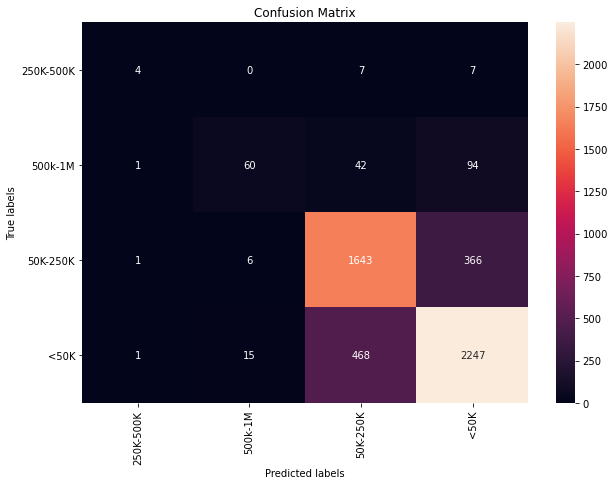

In [30]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

To check the model a cross validation with 5 splits an the accuracy is still good (70.74%). The tree classification model is the better of the three models.

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.71903323 0.70896274 0.69254032 0.70564516 0.71068548]
Baseline: 70.74% (0.86%)


## Conclusion

1. The K-neighbors and Tree Decision are not affected by unbalanced while the Logistic Regression does.
1. The best model was the Tree Regression model with an accuracy of 80%
1. The lak of data for some income categories difficult the classification as is shown in the confusion matrix.

## Next steps

1. Try to make model for others variables
1. Use the essays to predict another variables